In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append(".")
import neatplot
# neatplot.set_style("fonts")
neatplot.set_style()
plt.rcParams.update({
        'text.latex.preamble': r'\usepackage{amsfonts}'
    }
)


In [2]:
def arccosine(theta1, theta2):
    t = (theta1.T - theta2)
    t = (t % (2*np.pi)) - np.pi
    return np.abs(t) / np.pi

Saved figure heaviside1.pdf
Saved figure heaviside1.png


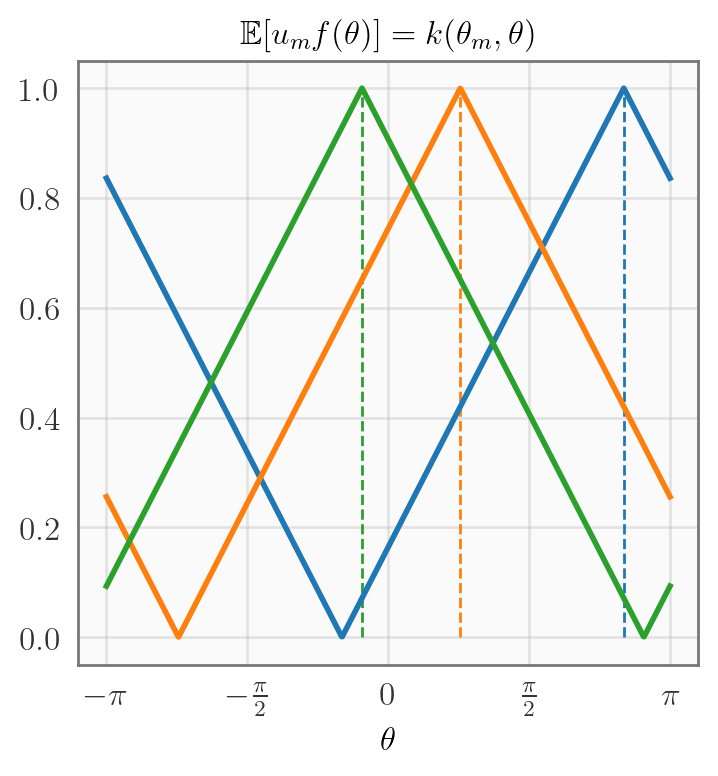

In [6]:
x = np.linspace(-np.pi, np.pi, 1000).reshape(-1, 1)

for i, z in enumerate(np.random.rand(3)):
    z = 2 * np.pi * z - np.pi
    k = arccosine(x, z)
    plt.plot(x.flatten(), k.flatten(), f"C{i}")
    plt.vlines(z, ymin=-0.0, ymax=1, color=f"C{i}", ls="--", lw=1)
    plt.xlabel(r"$\theta$")
    plt.title(r"$\mathbb{E}[u_m f(\theta)] = k(\theta_m, \theta)$")
    plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=[r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$",  r"$\frac{\pi}{2}$", r"$\pi$"])
neatplot.save_figure("heaviside1")

In [15]:
grid_size = 1000
samples = 50000
x = np.linspace(- np.pi, np.pi, grid_size)[:, None]
K = arccosine(x, x)

In [16]:
samples = np.linalg.cholesky(K + np.eye(len(K)) * 1e-6) @ np.random.randn(len(K), samples)

Saved figure heaviside2.pdf
Saved figure heaviside2.png


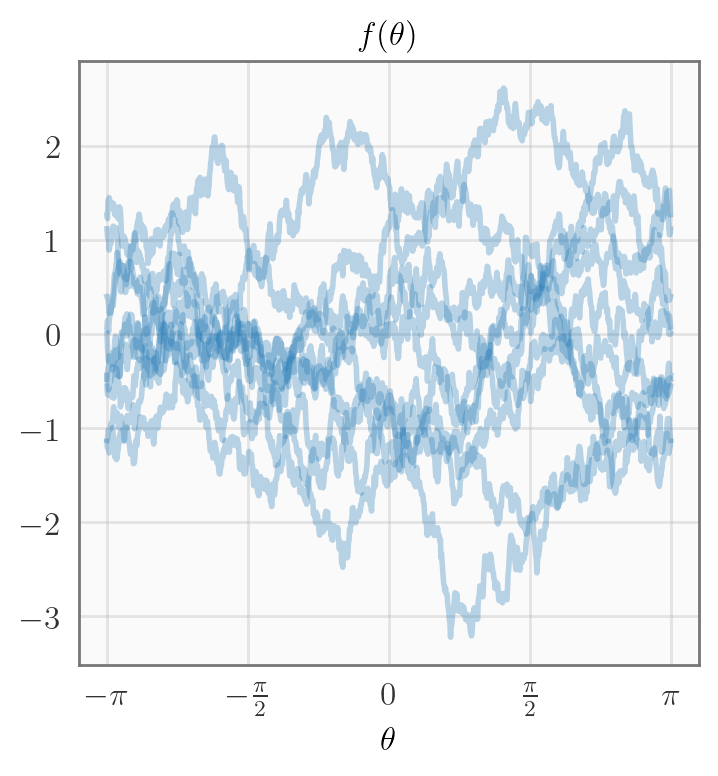

In [17]:
plt.plot(x, samples[:, :10], "C0", alpha=.3);
plt.xlabel(r"$\theta$");
plt.title(r"$f(\theta)$");
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=[r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$",  r"$\frac{\pi}{2}$", r"$\pi$"]);
neatplot.save_figure("heaviside2")

Saved figure heaviside3.pdf
Saved figure heaviside3.png


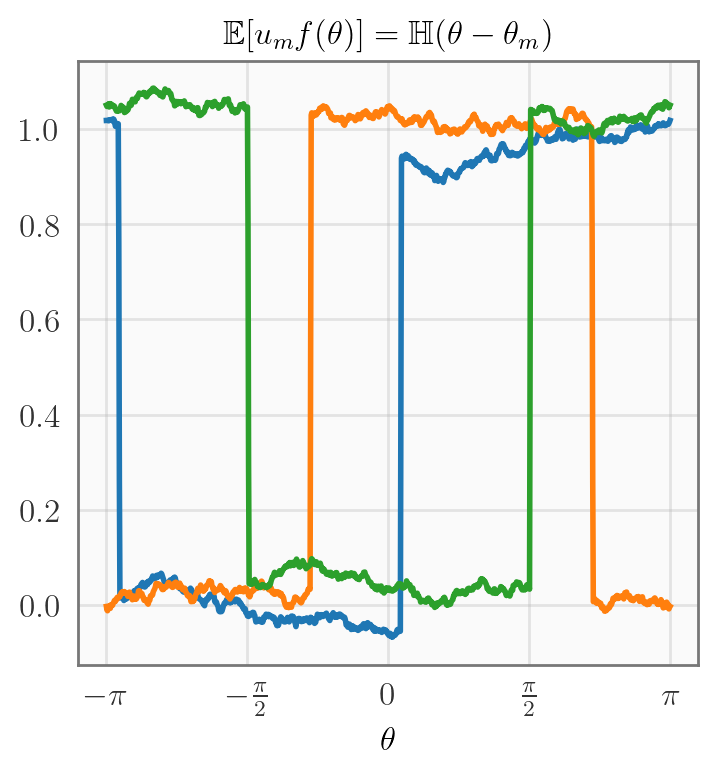

In [18]:
d_theta = (2 * np.pi) / grid_size
# theta0_idx = grid_size // 2
for theta0_idx in np.random.rand(3):
    df_dtheta0 = np.gradient(samples, d_theta, axis=0)
    df_dtheta0 = df_dtheta0[int(theta0_idx * len(df_dtheta0)), :]
    int_f = np.sum(samples * d_theta, axis=0)
    u_theta0 = np.pi * (1/2) * (df_dtheta0 + np.pi**(-2) * int_f)
    cov = np.mean(samples.T * u_theta0[:, None], axis=0)
    
    plt.xlabel(r"$\theta$");
    plt.title(r"$\mathbb{E}[u_m f(\theta)] = \mathbb{H}(\theta - \theta_m)$")
    plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=[r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$",  r"$\frac{\pi}{2}$", r"$\pi$"]);
    plt.plot(x, cov)

neatplot.save_figure("heaviside3")